In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as smp
import scipy as sp
from scipy.integrate import cumtrapz
from scipy import integrate
from scipy.integrate import quad
from scipy.integrate import trapz

In [2]:
pi = math.pi
m_p= 139.57 #MeV Meson Mass
m_l= 0.511 #MeV Positron Mass
m_l1 = 105.7 #MeV #mass l prime
#m_a => 2 cases: 10, 80 MeV
br = 1. #B(P+ -> l'+vl_1)

"2 cases, inside dd_branchratio function";
#g_ll=     1      or    1
#g_llbar=  0      or    1
#g_vl=     0      or    0

#E_plus = 1/2*(m_p-E_l+math.sqrt(E_l**2-m_l**2)+m_a**2*(m_p-E_l-math.sqrt(E_l**2-m_l**2))/(m_p**2+m_l**2-2*m_p*E_e))
#E_minus = 1/2*(m_p-E_l-math.sqrt(E_l**2-m_l**2)+m_a**2*(m_p-E_l+math.sqrt(E_l**2-m_l**2))/(m_p**2+m_l**2-2*m_p*E_e))

#m_l < E_l < m_p/2*(1-m_a**2/m_p**2+m_l**2/m_p**2);

#Plotting the integral of S-1 in terms of $E_l$.
This plot will resemble the theoretical particle detection of axion.

$$(S{-}1)$$

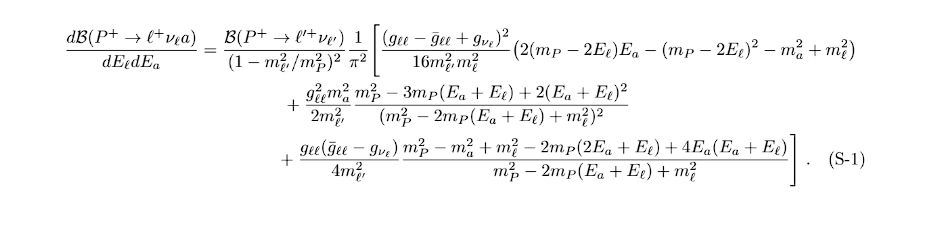

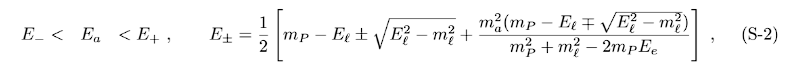

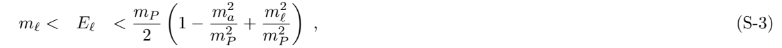

$$
-E(E_\ell) < E_\ell < +E(E_\ell)
$$
<br>
<br>
$$
When\space m_a = 10, -E(0.511) < E_a < +E(69.442)
$$
<br>
$$
When\space m_a = 80, -E(0.511) < E_a < +E(46.878)
$$

In [3]:
#S-1
def s_1(g_ll,g_llbar,g_vl,m_a,E_a,E_l):
  return br/((1-(m_l1**2)/(m_p**2))*(pi))**2*(
  ((g_ll-g_llbar+g_vl)**2/(16*m_l1**2*m_l**2))*(2*(m_p-2*E_l)*E_a-(m_p-2*E_l)**2-m_a**2+m_l**2)
   +(g_ll**2*m_a**2/(2*m_l1**2)*(m_p**2-3*m_p*(E_a+E_l)+2*(E_a+E_l)**2)/(m_p**2-2*m_p*(E_a+E_l)+m_l**2)**2)
   +(((g_ll*(g_llbar-g_vl))/(4*m_l1**2))*(m_p**2-m_a**2+m_l**2-2*m_p*(2*E_a+E_l)+4*E_a*(E_a+E_l))/(m_p**2-2*m_p*(E_a+E_l)+m_l**2))
   )

In [4]:
#S-2
def E_plus(E,m_a):
  return ((1/2)*(m_p-E + math.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p-E-math.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))
def E_minus(E,m_a):
  return ((1/2)*(m_p-E - math.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p-E+math.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))

In [5]:
#S-3
def E_l_upper(m_a):
  return m_p/2*(1-(m_a**2/m_p**2)+(m_l**2/m_p**2))

def E_l_print(m_a):
  print(f"{m_l} < E_l < {E_l_upper(m_a)}")

In [6]:
E_l_print(0)

0.511 < E_l < 69.7859354481622


In [7]:
#g,g,g,m_a,E_l,x
#E_l => E_l[i] value, E_a = x = E_l array

#Case 1: g_ll = 1, g_llbar = 0, g_vl = 0
#Weak Violating
def integral_case1(m_a):
  g_ll = 1
  g_llbar = 0
  g_vl = 0

  #a and b -> S-3
  b = E_l_upper(m_a)
  a = m_l
  E_l = np.linspace(a,b,100)
  #E_l[i]
  y = []

  for i in range(0,100):
    #integrate from E- to E+ with each E_l[i]
    E_plus = ((1/2)*(m_p-E_l[i] + np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p-E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
    E_minus = ((1/2)*(m_p-E_l[i] - np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p+E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))

    #integrand_f = type function for quad(f,b,a), f must be a function, not numpy/list
    integrand_f = lambda x: s_1(g_ll, g_llbar, g_vl, m_a, x,E_l[i])

    #return y plots each for loop
    y_val, error = quad(integrand_f, E_minus, E_plus)

    y.append(y_val)

  plt.ticklabel_format(axis = 'y', style = 'sci')
  plt.plot(E_l,y)
  plt.xlabel("$E_l$ (MeV)",fontweight="heavy")
  plt.ylabel("Integral of S-1",fontweight="heavy")
  plt.title(f"Case 1(WV): $g_{{ll}}$ = 1, $g_{{\\bar{{ll}}}}$, = 0, $g_{{vl}}$ = 0 : $m_a$ = {m_a}",fontweight="heavy")

  y_lim = 1.1*np.max(y)

  plt.ylim(0,y_lim)
  plt.xlim(0,100);

  integral_scalar = trapz(y, E_l)

  print(f"Area Under: {integral_scalar}")

#Weak Preserving
def integral_case2(m_a):
  g_ll = 1
  g_llbar = 1
  g_vl = 0

  b = E_l_upper(m_a)
  a = m_l
  E_l = np.linspace(a,b,100)
  #E_l[i]
  y = []

  for i in range(0,100):
    E_plus = ((1/2)*(m_p-E_l[i] + np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p-E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
    E_minus = ((1/2)*(m_p-E_l[i] - np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p+E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))

    #integrand_f = type function for quad(f,b,a), f must be a function, not numpy/list
    integrand_f = lambda x: s_1(g_ll, g_llbar, g_vl, m_a, x,E_l[i])

    y_val, error = quad(integrand_f, E_minus, E_plus)

    y.append(y_val)

  plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (-0.1, -0.000000000001))
  plt.xlabel("$E_l$ (MeV)",fontweight="heavy")
  plt.ylabel("Integral of S-1",fontweight="heavy")
  plt.title(f"Case 2(WP): $g_{{ll}}$ = 1, $g_{{\\bar{{ll}}}}$, = 1, $g_{{vl}}$ = 0 : $m_a$ = {m_a}",fontweight="heavy")
  plt.plot(E_l,y)

  y_lim = 1.1*np.max(y)

  plt.ylim(0,y_lim)
  plt.xlim(0,100);

  integral_scalar = trapz(y, E_l)

  print(f"Area Under: {integral_scalar}")

def return_integral_case1(m_a):
  g_ll = 1
  g_llbar = 0
  g_vl = 0

  #a and b -> S-3
  b = E_l_upper(m_a)
  a = m_l
  E_l = np.linspace(a,b,100)
  #E_l[i]
  y = []

  for i in range(0,100):
    #integrate from E- to E+ with each E_l[i]
    E_plus = ((1/2)*(m_p-E_l[i] + np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p-E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
    E_minus = ((1/2)*(m_p-E_l[i] - np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p+E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))

    #integrand_f = type function for quad(f,b,a), f must be a function, not numpy/list
    integrand_f = lambda x: s_1(g_ll, g_llbar, g_vl, m_a, x,E_l[i])

    #return y plots each for loop
    y_val, error = quad(integrand_f, E_minus, E_plus)

    y.append(y_val)

  integral_scalar = trapz(y, E_l)

  return integral_scalar

def return_integral_case2(m_a):
  g_ll = 1
  g_llbar = 1
  g_vl = 0

  b = E_l_upper(m_a)
  a = m_l
  E_l = np.linspace(a,b,100)
  #E_l[i]
  y = []

  for i in range(0,100):
    E_plus = ((1/2)*(m_p-E_l[i] + np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p-E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
    E_minus = ((1/2)*(m_p-E_l[i] - np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p+E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))

    #integrand_f = type function for quad(f,b,a), f must be a function, not numpy/list
    integrand_f = lambda x: s_1(g_ll, g_llbar, g_vl, m_a, x,E_l[i])

    y_val, error = quad(integrand_f, E_minus, E_plus)

    y.append(y_val)

  integral_scalar = trapz(y, E_l)

  return integral_scalar

In [8]:
return_integral_case1(10)

45.31652146164151

Area Under: 45.31652146164151


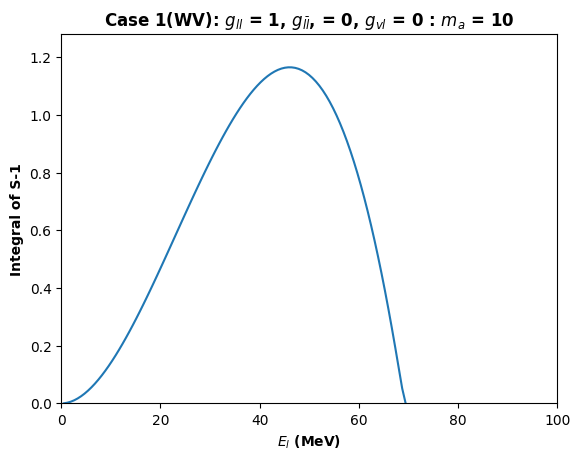

In [9]:
integral_case1(10)

Area Under: 4.030210601568808


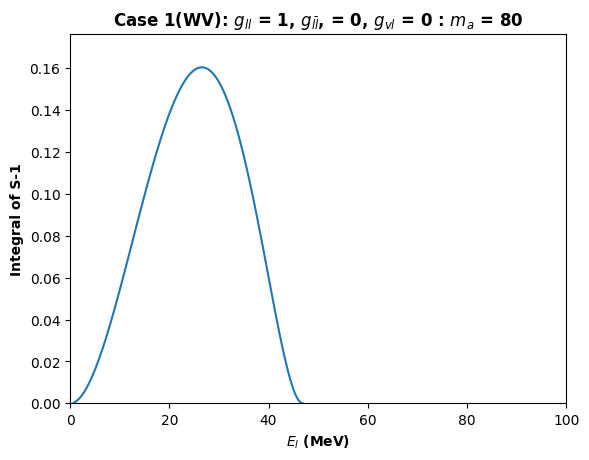

In [10]:
integral_case1(80)

Area Under: 0.008919023878873946


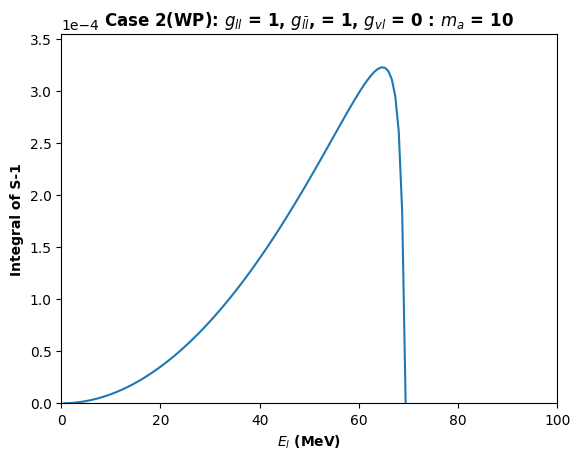

In [11]:
integral_case2(10)

Area Under: 0.0003526244302467526


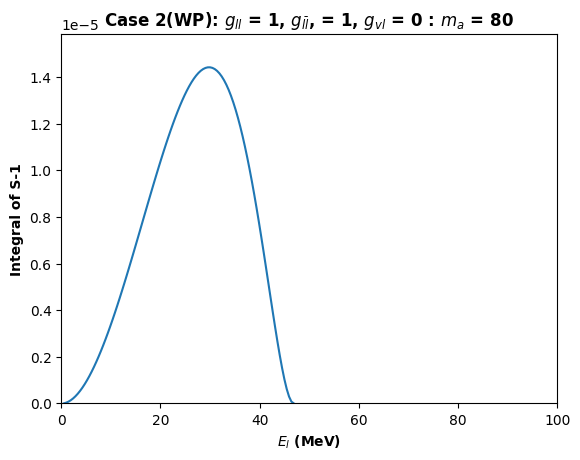

In [12]:
integral_case2(80)

# Plotting double integrals of S-1 and S-1 for case 1 (WV) and case 2 (WP).
The double integral will give you $BR$($P^+$→$l^+ v a$).
$m_l$ = $m_{l'}$ = 105.7

In [13]:
#plotting the double integral
m_l = m_l1

def double_integral_case1(m_a):
  final_integral_case1 = np.array([])

  for num in m_a:
    final_integral_case1=np.append(final_integral_case1,return_integral_case1(num))

  y = final_integral_case1

  plt.plot(m_a,y);
  plt.xlabel("$m_a$ (MeV)",fontweight="heavy")
  plt.ylabel("Double Integral of S-1",fontweight="heavy")
  plt.title(f"Case 1(WV): $g_{{ll}}$ = 1, $g_{{\\bar{{ll}}}}$, = 0, $g_{{vl}}$ = 0",fontweight="heavy")

  y_lim = 1.1*np.max(y)
  x_lim = len(m_a)
  plt.ylim(0,y_lim)
  plt.xlim(0,x_lim);

def return_di1(m_a):
  final_integral_case1 = np.array([])

  for num in m_a:
    final_integral_case1=np.append(final_integral_case1,return_integral_case1(num))

  return final_integral_case1

def double_integral_case2(m_a):
  final_integral_case2 = np.array([])

  for num in m_a:
    final_integral_case2=np.append(final_integral_case2,return_integral_case2(num))

  y = final_integral_case2

  plt.plot(m_a,y,color='orange');
  plt.xlabel("$m_a$ (MeV)",fontweight="heavy")
  plt.ylabel("Double Integral of S-1",fontweight="heavy")
  plt.title(f"Case 2(WP): ${{g_{{ll}}}}$ = 1, $g_{{\\bar{{ll}}}}$, = 1, $g_{{vl}}$ = 0",fontweight="heavy")

  y_lim = 1.1*np.max(y)

  plt.ylim(0,y_lim)
  plt.xlim(0,100);

def return_di2(m_a):
  final_integral_case2 = np.array([])

  for num in m_a:
    final_integral_case2=np.append(final_integral_case2,return_integral_case2(num))

  return final_integral_case2

def double_integral_case12(m_a):
  final_integral_case1 = np.array([])

  for num in m_a:
    final_integral_case1=np.append(final_integral_case1,return_integral_case1(num))

  y1 = final_integral_case1

  final_integral_case2 = np.array([])

  for num in m_a:
    final_integral_case2=np.append(final_integral_case2,return_integral_case2(num))

  y2 = final_integral_case2

  fig, axs = plt.subplots(1, 2, figsize=(12,3))

  # Plot for Case 1 on the left subplot
  axs[0].plot(m_a, y1)
  axs[0].set_title('Double Integral Case 1(WV)',fontweight="heavy")
  axs[0].set_xlabel('$m_a$ (MeV)',fontweight="heavy")
  axs[0].set_ylabel('Double Integral of S-1',fontweight="heavy")

  # Plot for Case 2 on the right subplot
  axs[1].plot(m_a, y2)
  axs[1].set_title('Double Integral Case 2(WP)',fontweight="heavy")
  axs[1].set_xlabel('$m_a$ (MeV)',fontweight="heavy")


In [14]:

i=25
while E_l_upper(i)>m_l:
  upperlim = E_l_upper(i)
  i+=1;
  max_i = i

print(upperlim)
print(max_i)
print(max_i-1)

105.90841477394855
34
33


In [15]:
#use return_integral_case1 to create y-axis array
#double integral will give you the branching ratio

m_a = np.linspace(1,33,35)

# Plotting S-1.
Hold everything constant while using $m_a$ as a variable.

In [16]:
def s_1_case1(m_a,E_a,E_l):
  return s_1(1,0,0,m_a,E_a,E_l)

def s_1_case2(m_a,E_a,E_l):
  return s_1(1,1,0,m_a,E_a,E_l)

def s_1_case12(m_a,E_a,E_l):
  fig, axs = plt.subplots(1, 2, figsize=(12, 3))
  axs[0].plot(m_a, s_1_case1(m_a,E_a,E_l));
  axs[0].set_title(f'Case 1(WV): $E_a$={E_a}, $E_l$={E_l}',fontweight="heavy")
  axs[0].set_xlabel('$m_a$ (MeV)',fontweight="heavy")
  axs[0].set_ylabel('S-1',fontweight="heavy")

  axs[1].plot(m_a, s_1_case2(m_a,E_a,E_l));
  axs[1].set_title(f'Case 2(WP): $E_a$={E_a}, $E_l$={E_l}',fontweight="heavy");
  axs[1].set_xlabel('$m_a$ (MeV)',fontweight="heavy");

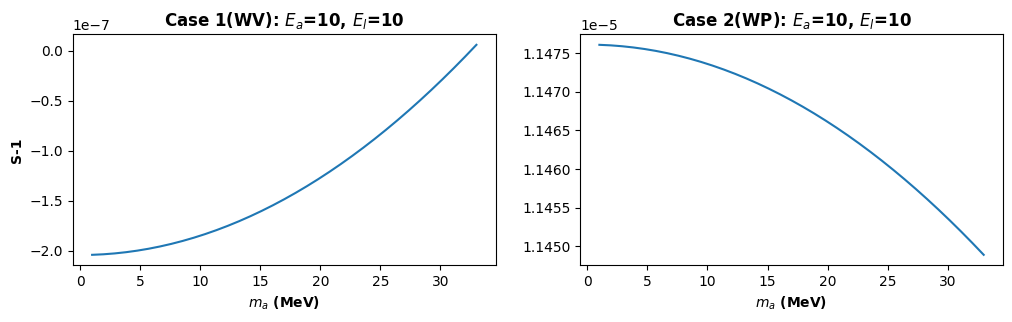

In [17]:
s_1_case12(m_a,10,10)

#Plotting S-1 and Double Integral of S-1.

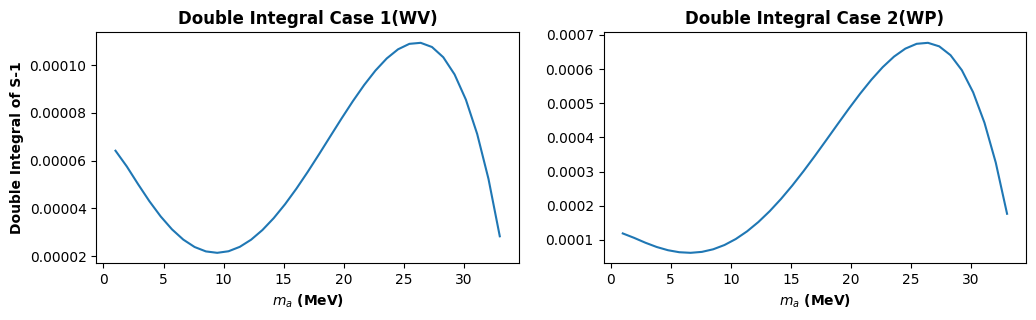

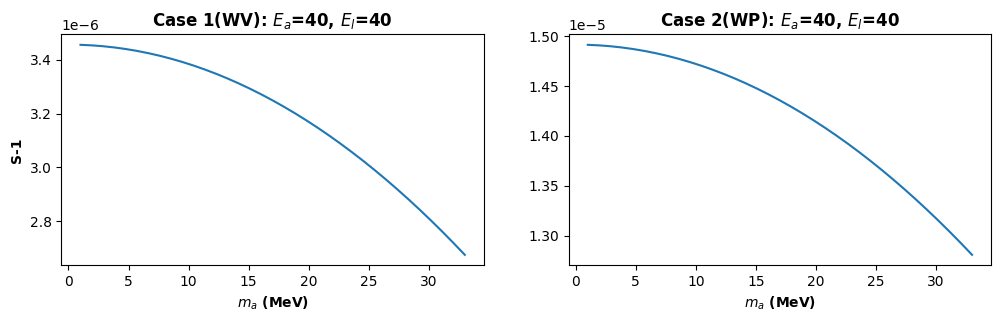

In [18]:
double_integral_case12(m_a)
s_1_case12(m_a,40,40)

Equation 4:

$\frac {Br_a}{Br_{ℓ'}} = \frac {1}{1536\pi^2}\frac {m_p^4}{m_\ell^2m_{\ell'}^2}{\left(1-\frac{m_{\ell'}^2}{m_p^2}\right)}^{-2} ₓ \left[ (g_{\ell\ell} - \bar g_{\ell\ell} + g_{v\ell} )^2 f_0(x_p)+\frac {16m_{\ell}^2}{m_p^2}g_{\ell\ell}^2 f_1(x_p) \right ]$
<br>
<br>
$f_0(x) = 1 - 8x + 8x^3 - x^4 - 12x^2 log(x)$
<br>
<br>
$f_1(x) = 1 + 9x - 9x^2 - x^3 + 6x(1+x)log(x)$

In [19]:
#m_a is the variable

m_a_x = np.linspace(0.1,200,200)

#eqn 5
def f0(x):
  return 1-8*x+8*x**3-x**4-12*x**2*np.log(x)

#eqn 6
def f1(x):
  return 1+9*x-9*x**2-x**3+6*x*(1+x)*np.log(x)

def x_p(m_a):
  return m_a**2/m_p**2

#weak violating, case 1, g_ll = 1, g_llbar = 0, g_vl = 0
def eqn4_case1(m_a):
   return (1/(1536*pi**2))*(m_p**4/(m_l**2*m_l1**2))*(1-(m_l1**2/m_p**2))**(-2)*(
          (1-0+0)**2*f0(x_p(m_a))+16*m_l**2/m_p**2*1**2*f1(x_p(m_a)))

#weak preserving, case 2, g_ll = 1, g_llbar = 1, g_vl = 0
def eqn4_case2(m_a):
   return (1/(1536*pi**2))*(m_p**4/(m_l**2*m_l1**2))*(1-(m_l1**2/m_p**2))**(-2)*(
          (1-1+0)**2*f0(x_p(m_a))+16*m_l**2/m_p**2*1**2*f1(x_p(m_a)))

#weak violating, case 1, g_ll = 1, g_llbar = 0, g_vl = 0
def graph_eqn4_case1(m_a):
  print(f"Eqn4: m_a = 10: {eqn4_case1(10)}")
  print(f"S-1: m_a = 10: {return_integral_case1(10)}")
  print(f"Eqn4: m_a = 80: {eqn4_case1(80)}")
  print(f"S-1: m_a = 80: {return_integral_case1(80)}")

  plt.figure()

  plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (-0.1, -0.000000000001))
  plt.xlabel("m_a (MeV)",fontweight="heavy")
  plt.ylabel("Eqn 4 BR: WV",fontweight="heavy")
  plt.title(f"g_ll = 1, g_llbar = 0, g_vl =0",fontweight="heavy")

  plt.plot(m_a_x, eqn4_case1(m_a))

  plt.show()

#weak preserving, case 2, g_ll = 1, g_llbar = 1, g_vl = 0
def graph_eqn4_case2(m_a):
  print(f"m_a = 10: {eqn4_case2(10)}")
  print(f"S-1: m_a = 10: {return_integral_case2(10)}")
  print(f"m_a = 80: {eqn4_case2(80)}")
  print(f"S-1: m_a = 80: {return_integral_case2(80)}")

  plt.figure()

  plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (-0.1, -0.000000000001))
  plt.xlabel("m_a (MeV)",fontweight="heavy")
  plt.ylabel("Eqn 4 BR: WP",fontweight="heavy")
  plt.title(f"g_ll = 1, g_llbar = 1, g_vl =0",fontweight="heavy")

  plt.plot(m_a_x, eqn4_case2(m_a))

  plt.show()

Eqn4: m_a = 10: 0.009991186995590961
S-1: m_a = 10: 2.1576441010769137e-05
Eqn4: m_a = 80: 0.00044730103501247414


<ipython-input-7-656d0096b859>:98: RuntimeWarning: invalid value encountered in sqrt
  E_plus = ((1/2)*(m_p-E_l[i] + np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p-E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
<ipython-input-7-656d0096b859>:99: RuntimeWarning: invalid value encountered in sqrt
  E_minus = ((1/2)*(m_p-E_l[i] - np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p+E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
<ipython-input-7-656d0096b859>:105: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  y_val, error = quad(integrand_f, E_minus, E_plus)


S-1: m_a = 80: nan


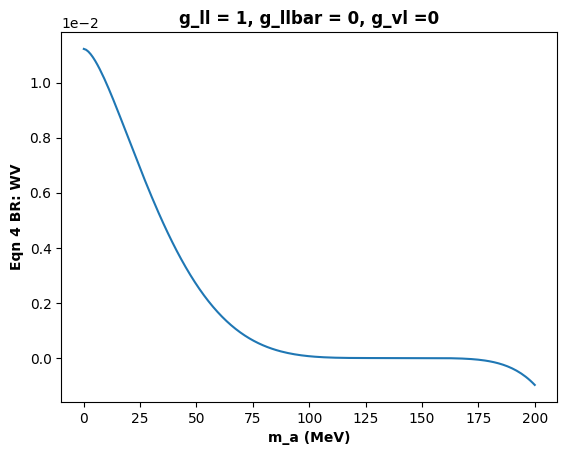

In [20]:
graph_eqn4_case1(m_a_x)

m_a = 10: 0.008932008706163324
S-1: m_a = 10: 9.414161600719995e-05
m_a = 80: 0.0003530550903919562


<ipython-input-7-656d0096b859>:125: RuntimeWarning: invalid value encountered in sqrt
  E_plus = ((1/2)*(m_p-E_l[i] + np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p-E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
<ipython-input-7-656d0096b859>:126: RuntimeWarning: invalid value encountered in sqrt
  E_minus = ((1/2)*(m_p-E_l[i] - np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p+E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
<ipython-input-7-656d0096b859>:131: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  y_val, error = quad(integrand_f, E_minus, E_plus)


S-1: m_a = 80: nan


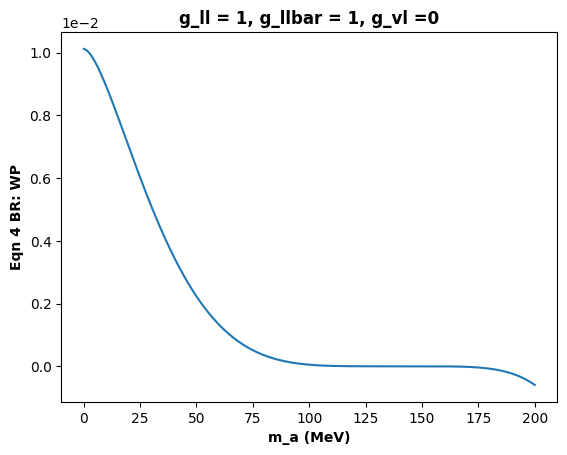

In [21]:
graph_eqn4_case2(m_a_x)

In [22]:
#Case 1: g_ll = 1, g_llbar = 0, g_vl = 0
#Weak Violating
def value_integral_case1(m_a):
  g_ll = 1
  g_llbar = 0
  g_vl = 0

  #a and b -> S-3
  b = E_l_upper(m_a)
  a = m_l
  E_l = np.linspace(a,b,100)
  #E_l[i]
  y = []

  for i in range(0,100):
    #integrate from E- to E+ with each E_l[i]
    E_plus = ((1/2)*(m_p-E_l[i] + np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p-E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
    E_minus = ((1/2)*(m_p-E_l[i] - np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p+E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))

    #integrand_f = type function for quad(f,b,a), f must be a function, not numpy/list
    integrand_f = lambda x: s_1(g_ll, g_llbar, g_vl, m_a, x,E_l[i])

    #return y plots each for loop
    y_val, error = quad(integrand_f, E_minus, E_plus)

    y.append(y_val)

  integral_scalar = trapz(y, E_l)

  return integral_scalar

#Case 2: g_ll = 1, g_llbar = 1, g_vl = 0
#Weak Preserving
def value_integral_case2(m_a):
  g_ll = 1
  g_llbar = 1
  g_vl = 0

  #a and b -> S-3
  b = E_l_upper(m_a)
  a = 0.511
  E_l = np.linspace(a,b,100)
  #E_l[i]
  y = []

  for i in range(0,100):
    #integrate from E- to E+ with each E_l[i]
    E_plus = ((1/2)*(m_p-E_l[i] + np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p-E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
    E_minus = ((1/2)*(m_p-E_l[i] - np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p+E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))

    #integrand_f = type function for quad(f,b,a), f must be a function, not numpy/list
    integrand_f = lambda x: s_1(g_ll, g_llbar, g_vl, m_a, x,E_l[i])

    #return y plots each for loop
    y_val, error = quad(integrand_f, E_minus, E_plus)

    y.append(y_val)

  integral_scalar = trapz(y, E_l)

  return integral_scalar

#s1_area is double integral
def graph_s1_area_case1(m_a):
  s1_case1_area = []
  for i in range(1,201):
    s1_case1_area.append(value_integral_case1(i))

  plt.figure()

  plt.plot(m_a,s1_case1_area)

  plt.show()

#s1_area is double integral
def graph_s1_area_case2(m_a):
  s1_case2_area = []
  for i in range(1,201):
    s1_case2_area.append(value_integral_case2(i))

  plt.figure()

  plt.plot(m_a,s1_case2_area)

  plt.show()

<ipython-input-22-fc386d270323>:17: RuntimeWarning: invalid value encountered in sqrt
  E_plus = ((1/2)*(m_p-E_l[i] + np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p-E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
<ipython-input-22-fc386d270323>:18: RuntimeWarning: invalid value encountered in sqrt
  E_minus = ((1/2)*(m_p-E_l[i] - np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p+E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
<ipython-input-22-fc386d270323>:24: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  y_val, error = quad(integrand_f, E_minus, E_plus)


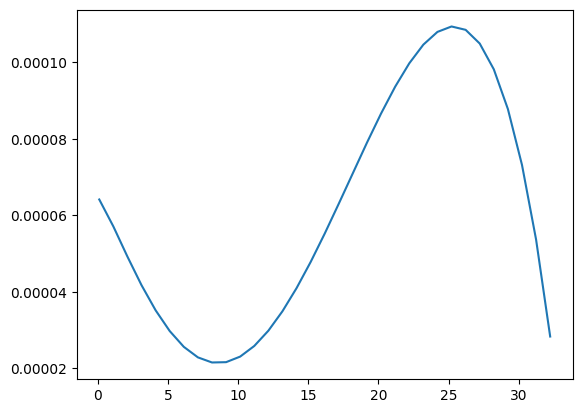

In [ ]:
graph_s1_area_case1(m_a_x)

<ipython-input-22-fc386d270323>:48: RuntimeWarning: invalid value encountered in sqrt
  E_plus = ((1/2)*(m_p-E_l[i] + np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p-E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
<ipython-input-22-fc386d270323>:49: RuntimeWarning: invalid value encountered in sqrt
  E_minus = ((1/2)*(m_p-E_l[i] - np.sqrt(E_l[i]**2-m_l**2) + ((m_a**2*(m_p+E_l[i]-np.sqrt(E_l[i]**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E_l[i]))))
<ipython-input-22-fc386d270323>:55: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  y_val, error = quad(integrand_f, E_minus, E_plus)


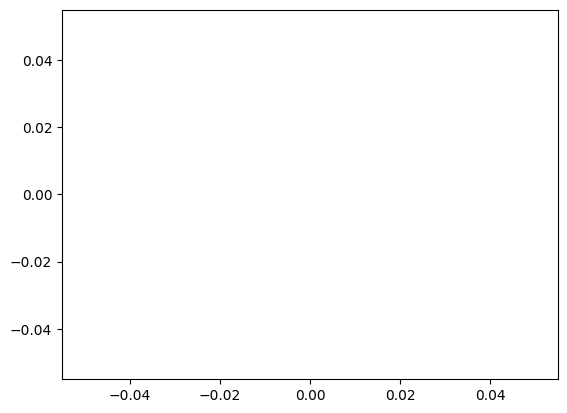

In [ ]:
graph_s1_area_case2(m_a_x)

$$f(E_l,E_a)=(S{-}1)$$
<br>
$$Integrating\space S{-}1\space in\space respect\space to\space dE_a$$

$$\int_{-E}^{+E} (S{-}1)dE_a = $$
<br>
<br>

$$
Let\space\space \frac{\beta(P^+\rightarrow \ell'^+v_{\ell'})} {(1-\frac {m^2_{\ell'}} {{m_p^2}})^2π^2} = B = scalar
$$

<br>
<br>

$$
Let\space\space \frac{(g_{\ell\ell}-\overline g_{\ell\ell}+g_{v_\ell})^2}{16m_\ell'^2m_l^2} = A = scalar
$$

<br>
<br>

$$
Let\space\space \frac{g_{\ell\ell}^2m_a^2}{2m_{\ell'}^2} = T = scalar
$$

<br>
<br>

$$
Let\space\space \frac{g_{\ell\ell}(\bar g_{\ell\ell}-g_{vl})}{4m_{ℓ'}^2}= D = scalar
$$

<br>
<br>

$$
\int_{E-}^{E+} f(E_l,E_a)dE_a =
B[A\int_{E-}^{E+}(2(m_p-2E_\ell)E_a-(m_p-2E_\ell)^2-m_a^2+m_\ell^2)dE_a
$$

<br>

$$
+ T\int_{E-}^{E+}(\frac {m_p^2-3m_p(E_a+E_\ell)+2(E_a+E_\ell)^2} {(m_p^2-2m_p(E_a+E_\ell)+m_\ell^2)^2})dE_a
$$

<br>

$$
+ D\int_{E-}^{E+} \frac {m_p^2-m_a^2+m_\ell^2-2m_p(2E_a+E_\ell)+4E_a(E_a+E_\ell)}{m_p^2-2m_p(E_a+E_\ell)+m_\ell^2}dE_a]
$$

<br>
<br>

$$
m_p = H = scalar
$$
 <br>
$$
m_a = L = scalar
$$
<br>
$$
m_l = K = scalar
$$
<br>
$$
E_l = E
$$
<br>
$$
E_a = x = variable
$$
<br>
$$
E- = a
$$
<br>
$$
E+ = b
$$

<br>
<br>
<br>
$$
\int_{a}^{b} f(E,x)dx =
B[A\int_{a}^{b}(2(H-2E)x-(H-2E)^2-L^2+K^2)dx
$$

<br>
<br>

$$
+ T\int_{a}^{b}(\frac {H^2-3H(x+E)+2(x+E)^2} {(H^2-2H(x+E)+K^2)^2})dx
$$

<br>
<br>

$$
+ D\int_{a}^{b} \frac {H^2-L^2+K^2-2H(2x+E)+4x(x+E)}{H^2-2H(x+E)+K^2}]dx
$$

<br>
<br>
<br>
<br>

$$
(S{-}2)
$$
<br>
$$
{E+} = \frac {1} {2} [m_p-E_l+\sqrt[]{E_l^2-m_l^2}+ \frac {m_a^2(m_p - E_l-\sqrt[]{E_l^2-m_l^2})} {m_p^2 + m_l^2 - 2 m_p E_\ell}] = {+E(E_l)}
$$
<br>
$$
{E-} = \frac {1} {2} [m_p-E_l-\sqrt[]{E_l^2-m_l^2}+ \frac {m_a^2(m_p - E_l+\sqrt[]{E_l^2-m_l^2})} {m_p^2 + m_l^2 - 2 m_p E_\ell}] = {-E(E_l)}
$$
<br>
$$
\int_{E-}^{E+} f(E_\ell,E_a)dE_a = F(E_\ell,+E(E_\ell)) - F(E_\ell,-E(E_\ell))
$$

<br>
<br>
<br>
$$(S{-}3)$$

$$
m_\ell < E_\ell < \frac {m_p} {2}(1-\frac {m_a^2} {m_p^2} + \frac {m_\ell^2} {m_p^2})
$$

In [ ]:
E_l_print(10)
E_l_print(80)

105.7 < E_l < 109.4514397793222
105.7 < E_l < 86.88211972486924


Integral of S-1 each term:

Term 1:

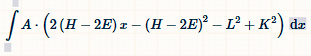

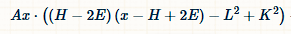

Term 2:

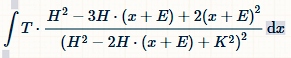

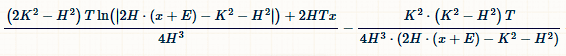

Term 3:

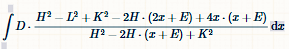

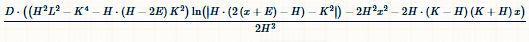

In [ ]:
def integral_s1(g_ll,g_llbar,g_vl,m_a,E):
  A = (g_ll - g_llbar + g_vl) ** 2 / (16 * m_l1 ** 2 * m_l ** 2)
  T = g_ll ** 2 * m_a ** 2 / (2 * m_l1 ** 2)
  D = g_ll * (g_llbar - g_vl) / (4 * m_l1 ** 2)
  L = m_a
  K = m_l
  H = m_p
  B = br / (pi * (1 - (m_l1 ** 2) / (m_p ** 2))) ** 2

  print("A:",A)
  print("T:",T)
  print("D:",D)
  print("L=m_a:",L)
  print("K=m_l:",K)
  print("H=m_p:",H)
  print("B:",B)
  #divide S-1 into terms so it's easier to graph/calculate
  #term#(x2) - term#(x1) = G(a) - G(b) -> integral from a to b

  #x2 = E+
  #x1 = E-
  x2 = ((1/2)*(m_p-E + np.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p-E-np.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))
  x1 = ((1/2)*(m_p-E - np.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p+E-np.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))

  #results of integrals
  #Example: term1 = G1(x2) - G1(x1)
  #replace each x with x2 and x1 boundaries
  #don't forget to multiply each term by B or multiply everything by B
  term1 = B*(
      (A*x2*((H-2*E)*(x2-H+2*E)-L**2+K**2))
      -
      (A*x1*((H-2*E)*(x2-H+2*E)-L**2+K**2))
      )

  term2 = B*(
      (((2*K**2-H**2)*T*np.log(abs(x2+E-K**2-H**2))+2*H*T*x2)/(4*H**3)-((K**2*(K**2-H**2)*T)/(4*H**3*(2*H*(x2+E)-K**2-H**2))))
      -
      (((2*K**2-H**2)*T*np.log(abs(x2+E-K**2-H**2))+2*H*T*x1)/(4*H**3)-((K**2*(K**2-H**2)*T)/(4*H**3*(2*H*(x1+E)-K**2-H**2))))
      )

  term3 = B*(
      (D*((H**2*L**2-K**4-H*(H-2*E)*K**2)*np.log(abs(H*(2*(x2+E)-H)-K**2))-2*H**2*x2**2-2*H*(K-H)*(K+H)*x2)/(2*H**2))
      -
      (D*((H**2*L**2-K**4-H*(H-2*E)*K**2)*np.log(abs(H*(2*(x1+E)-H)-K**2))-2*H**2*x1**2-2*H*(K-H)*(K+H)*x1)/(2*H**2))
      )

  G = term1+term2+term3

  return G

#g_ll = 1, g_llbar = 0, g_vl = 0
def graph_integral_s1_case1(m_a):
  x = np.linspace(0.512,69,100) #E_l
  y = integral_s1(1,0,0,m_a,x)
  plt.figure()
  plt.plot(x,y)
  plt.xlim(0.511,69.44276905802292)
  plt.grid(True)
  plt.show()

#g_ll = 1, g_llbar = 1, g_vl = 0
def graph_integral_s1_case2(m_a):
  x = np.linspace(0.511,46.87829914398281,100) #E_l
  y = integral_s1(1,1,0,m_a,x)
  plt.figure()
  plt.plot(x,y)
  plt.xlim(0.511,46.87829914398281)
  plt.grid(True)
  plt.show()

A: 5.007028554241857e-10
T: 0.004475278116158529
D: 0.0
L=m_a: 10
K=m_l: 105.7
H=m_p: 139.57
B: 0.5571207231459471


<ipython-input-26-8386dcadbd3d>:22: RuntimeWarning: invalid value encountered in sqrt
  x2 = ((1/2)*(m_p-E + np.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p-E-np.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))
<ipython-input-26-8386dcadbd3d>:23: RuntimeWarning: invalid value encountered in sqrt
  x1 = ((1/2)*(m_p-E - np.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p+E-np.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))


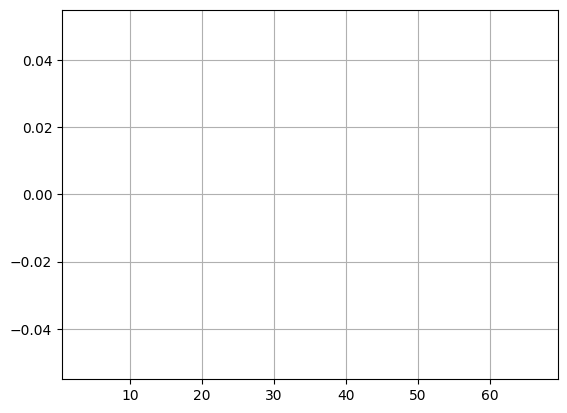

In [ ]:
graph_integral_s1_case1(10)

A: 5.007028554241857e-10
T: 0.28641779943414586
D: 0.0
L=m_a: 80
K=m_l: 105.7
H=m_p: 139.57
B: 0.5571207231459471


<ipython-input-26-8386dcadbd3d>:22: RuntimeWarning: invalid value encountered in sqrt
  x2 = ((1/2)*(m_p-E + np.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p-E-np.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))
<ipython-input-26-8386dcadbd3d>:23: RuntimeWarning: invalid value encountered in sqrt
  x1 = ((1/2)*(m_p-E - np.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p+E-np.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))


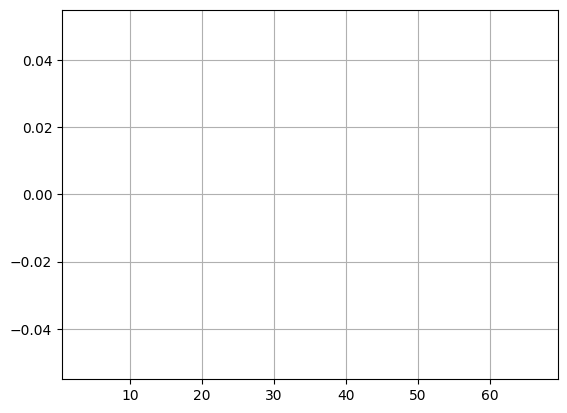

In [ ]:
graph_integral_s1_case1(80)

A: 0.0
T: 0.004475278116158529
D: 2.2376390580792644e-05
L=m_a: 10
K=m_l: 105.7
H=m_p: 139.57
B: 0.5571207231459471


<ipython-input-26-8386dcadbd3d>:22: RuntimeWarning: invalid value encountered in sqrt
  x2 = ((1/2)*(m_p-E + np.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p-E-np.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))
<ipython-input-26-8386dcadbd3d>:23: RuntimeWarning: invalid value encountered in sqrt
  x1 = ((1/2)*(m_p-E - np.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p+E-np.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))


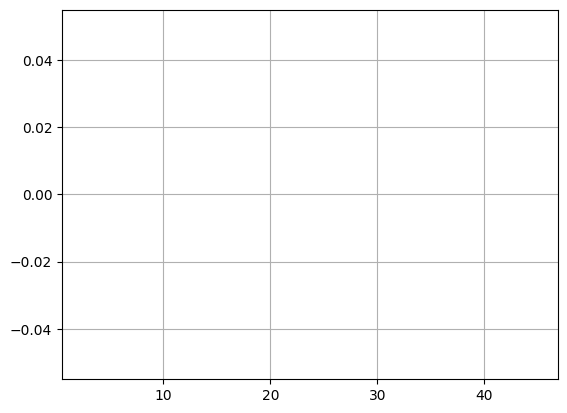

In [ ]:
graph_integral_s1_case2(10)

A: 0.0
T: 0.28641779943414586
D: 2.2376390580792644e-05
L=m_a: 80
K=m_l: 105.7
H=m_p: 139.57
B: 0.5571207231459471


<ipython-input-26-8386dcadbd3d>:22: RuntimeWarning: invalid value encountered in sqrt
  x2 = ((1/2)*(m_p-E + np.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p-E-np.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))
<ipython-input-26-8386dcadbd3d>:23: RuntimeWarning: invalid value encountered in sqrt
  x1 = ((1/2)*(m_p-E - np.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p+E-np.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))


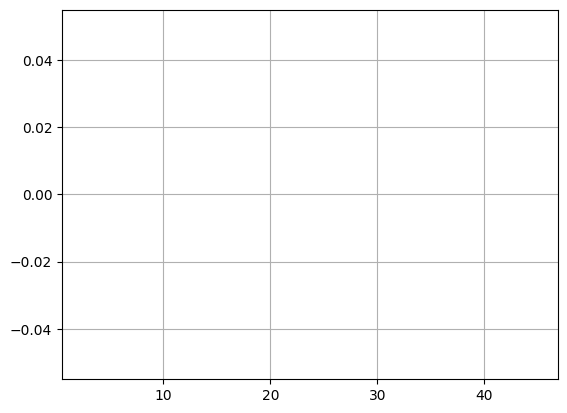

In [ ]:
graph_integral_s1_case2(80)